<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning - Diabetes prediction </b></div>

![](https://img.freepik.com/fotos-gratis/banner-medico-com-medico-usando-oculos_23-2149611193.jpg?t=st=1723492551~exp=1723496151~hmac=fde5796461da5e9e6399fa03d2a8998bd4a45e2fa0810a2c0ca42662e1cf03e0&w=740)

### Part 1 - Business Problem: Prevention and Management of Diabetes in Vulnerable Communities

**Context:**

Diabetes is a chronic disease that can lead to serious complications if not properly managed. In vulnerable communities, such as Pakistani population, access to preventive healthcare may be limited. The ability to predict the likelihood of a person developing diabetes based on diagnostic data is crucial for effectively implementing preventive, educational, and clinical interventions.

**Objective:**

Develop a machine learning model that can accurately predict the probability of a Pima heritage patient developing diabetes. This model will be used by community health clinics to identify individuals at risk and implement early intervention programs, such as health education, continuous monitoring, and nutritional support.

**Expected Outcomes:**

1. **Accurate Identification of At-Risk Patients:** The model should be able to identify patients at high risk of diabetes, allowing healthcare professionals to prioritize limited resources more effectively.

2. **Reduction in Healthcare Costs:** By predicting risk and initiating early interventions, the model can help reduce the costs associated with long-term complications of diabetes.

3. **Improvement in Quality of Life:** With early interventions, the quality of life of patients is expected to improve, reducing the disease's impact on the community.

**Success Metrics:**

- Model accuracy, area under the ROC curve (AUC), and precision in recall (sensitivity) are important metrics to ensure that the model is robust and reliable.

- Reduction in the number of new diabetes cases in the target population after the model's implementation.

**Implementation:**

- **Model Training and Validation:** Using the dataset, a machine learning model will be trained and validated, considering variables such as the number of pregnancies, glucose, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age.

- **Integration into Clinical Workflow:** The model will be integrated into the local healthcare system, where healthcare professionals can use it to make informed decisions about patient management.

This business problem not only highlights the importance of prevention and early intervention in diabetes treatment but also promotes the use of artificial intelligence to improve health in communities that need it most.

In [1]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.11.7
Author: Library versions

numpy     : 1.26.4
pandas    : 2.1.4
watermark : 2.4.3
matplotlib: 3.8.0
plotly    : 5.9.0
re        : 2.2.1
seaborn   : 0.12.2



# Part 2)- Dataset


- **Pregnancies**: Number of times the patient has been pregnant.
  
- **Glucose**: Plasma glucose concentration measured 2 hours after an oral glucose tolerance test.
  
- **BloodPressure**: Diastolic blood pressure, measured in millimeters of mercury (mm Hg).
  
- **SkinThickness**: Triceps skin fold thickness, measured in millimeters (mm).
  
- **Insulin**: 2-hour serum insulin level, measured in micro units per milliliter (mu U/ml).
  
- **BMI**: Body Mass Index, calculated as weight in kilograms divided by height in meters squared (kg/m²).
  
- **DiabetesPedigreeFunction**: A function that represents the likelihood of diabetes based on family history.
  
- **Age**: Age of the patient, measured in years.
  
- **Outcome**: The target variable indicating whether the patient has diabetes or not. It is a binary variable where 1 represents the presence of diabetes (268 cases out of 768), and 0 represents the absence of diabetes.

In [2]:
# dataset 1 
df_1 = pd.read_csv("diabetes.csv")

# dataset 2 
df_2 = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df_1.shape

(768, 9)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_1.dtypes

# Part 3) Exploratory data analysis

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df_1.duplicated().sum()

0

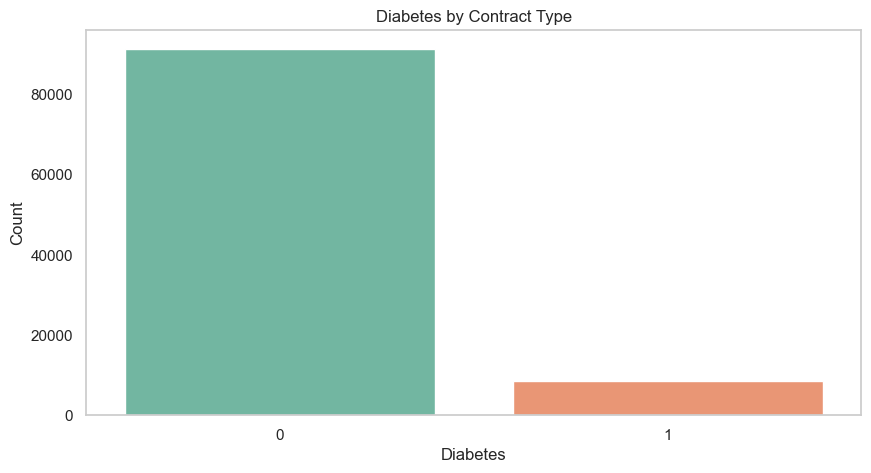

In [9]:
# diabetes count by contract type
plt.figure(figsize=(10, 5))
sns.countplot(x='diabetes', data=df_2, palette='Set2')
plt.title('Diabetes by Contract Type')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

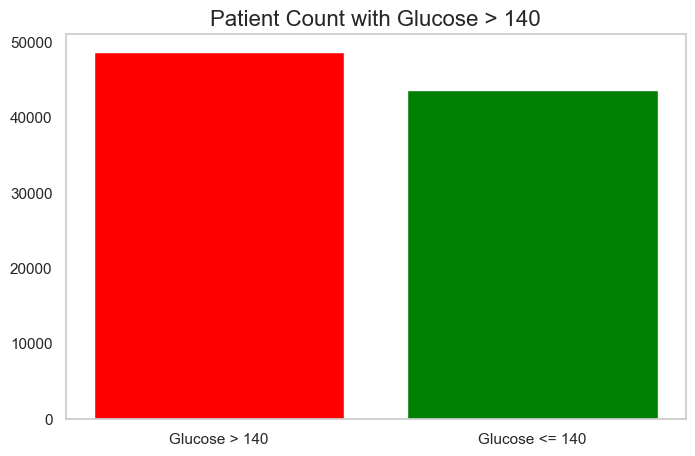

In [10]:
glucose_limit = 140

count_above_limit = df_2[df_2["blood_glucose_level"] > glucose_limit].shape[0]
count_below_limit = df_2[df_2["blood_glucose_level"] < glucose_limit].shape[0]

plt.figure(figsize=(8, 5))
plt.bar(['Glucose > 140', 'Glucose <= 140'], [count_above_limit, count_below_limit], color=['red', 'green'])
plt.title('Patient Count with Glucose > 140', fontsize=16)
plt.grid(False)
plt.show()


### Observations:

- **Relatively Balanced Distribution**: The graph indicates that the number of patients with glucose levels above 140 mg/dL is comparable to the number of patients with glucose levels below or equal to 140 mg/dL. Both groups have high numbers of patients, but there is a slight difference between them.

- **Relevance of Glucose Limit**: The value of 140 mg/dL is a limit frequently used in glucose tolerance tests to assess the risk of diabetes. Patients with glucose levels above this value may be at increased risk of diabetes or complications related to high glucose.

- **Clinical Implications**: This graph may suggest that a significant portion of the population studied has high glucose levels, which may have implications for public health and diabetes prevention strategies. - **Additional Analysis**: It may be interesting to segment these groups by other variables, such as age, body mass index (BMI), or medical history, to better understand the factors that contribute to high glucose levels.

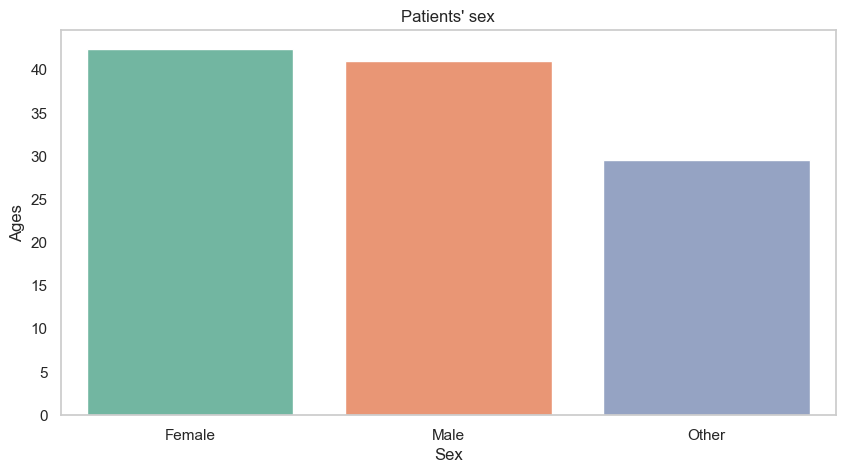

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x="gender", y="age", data=df_2, ci=None,palette='Set2')
plt.title("Patients' sex")
plt.xlabel("Sex")
plt.ylabel("Ages")
plt.grid(False)
plt.show()

This bar graph shows the distribution of patient ages, grouped by sex. The bars represent the mean age for each sex group, while the vertical lines above the bars indicate the confidence interval (or standard error) of the mean.

1. **X-Axis - Sex**:

- The X-axis categorizes patients into three sex groups: "Female", "Male", and "Other".

2. **Y-Axis - Ages**:

- The Y-axis represents the ages of the patients, likely showing the mean age for each group.

3. **Bars**:

- **Female**: The mean age of female patients is just over 40 years old.

- **Male**: The mean age of male patients is similar to that of female patients, also around 40 years old. - **Other**: The mean age of this group is slightly lower, but with greater variability (indicated by the larger error line).

- **Similar Mean Age**: For both men and women, the mean age appears to be fairly close, suggesting that the study population is similar in terms of age distribution between these two groups.

- **Greater Variability in the "Other" Group**: The "Other" group has a slightly lower mean age, but with greater variability. This may indicate that the sample for this group is smaller or more diverse in terms of age.

- **Sample Size**: The greater variability in the "Other" group may suggest that the sample size is smaller, which may impact the accuracy of the mean and confidence interval.

- **Additional Segmentation**: It may be useful to explore whether other factors, such as the presence of medical conditions, influence the age differences between these groups.

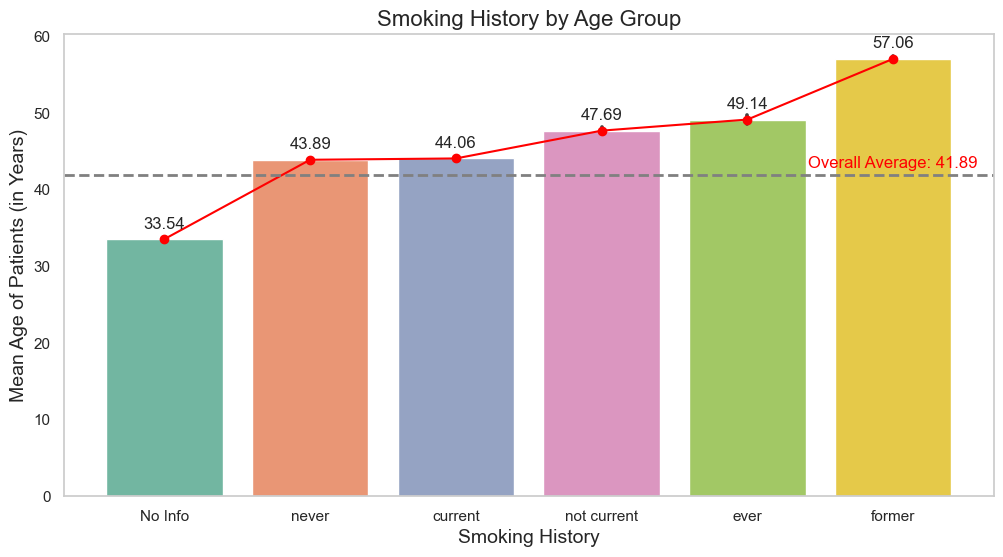

In [12]:
# Plot barplot
plt.figure(figsize=(12, 6)) 
sns.barplot(x="smoking_history", y="age", data=df_2, palette="Set2", order=df_2.groupby("smoking_history")["age"].mean().sort_values().index) 
plt.title("Smoking History by Age Group", fontsize=16)
plt.xlabel("Smoking History", fontsize=14)
plt.ylabel("Mean Age of Patients (in Years)", fontsize=14) 

mean_ages_sorted = df_2.groupby("smoking_history")["age"].mean().sort_values().values
plt.plot(range(len(mean_ages_sorted)), mean_ages_sorted, linestyle="-", color="red", marker='o')
for i, value in enumerate(mean_ages_sorted):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom')

mean_age = df_2['age'].mean()
plt.axhline(y=mean_age, color='gray', linestyle='--', linewidth=2)
plt.text(len(mean_ages_sorted) - 1, mean_age + 1, f'Overall Average: {mean_age:.2f}', color='red', ha='center')
plt.grid(False) 
plt.show()

This graph displays the relationship between the average age of patients and their smoking history, categorized into several categories, such as "No Info", "never", "current", "not current", "ever" and "former".

### Graph Explanation:

1. **Colored Bars**:
- Each bar represents the average age of patients for each smoking history category.
- The height of the bar indicates the average age corresponding to that category.

2. **Red Line with Dots**:
- The red line connects the midpoints of each bar, indicating the progression of the average age from one category to the next.
- The red dots mark the exact averages for each category, with the values ​​displayed above each point.

3. **Grey Dotted Line**:
- This horizontal line represents the overall average of all ages, regardless of smoking category.
- The line serves as a reference to compare whether the average age for each category is above or below the overall average.

4. **Overall Average Text**:
- The red text next to the dotted line indicates the overall average age, which is 41.89 years.

### Interpretation:

- Patients in the "former" category (ex-smokers) have the highest average age (57.06 years), significantly above the overall average.
- Patients in the "No Info" category (no information) have the lowest average age (33.54 years), below the overall average.
- The average age increases progressively towards the "former" category, suggesting that the average age of patients may be correlated with their smoking history.

This graph is useful for understanding how the average age of patients varies according to their smoking history, showing a trend of increasing average age in smoking-related categories, especially among former smokers.

# Observing outliers

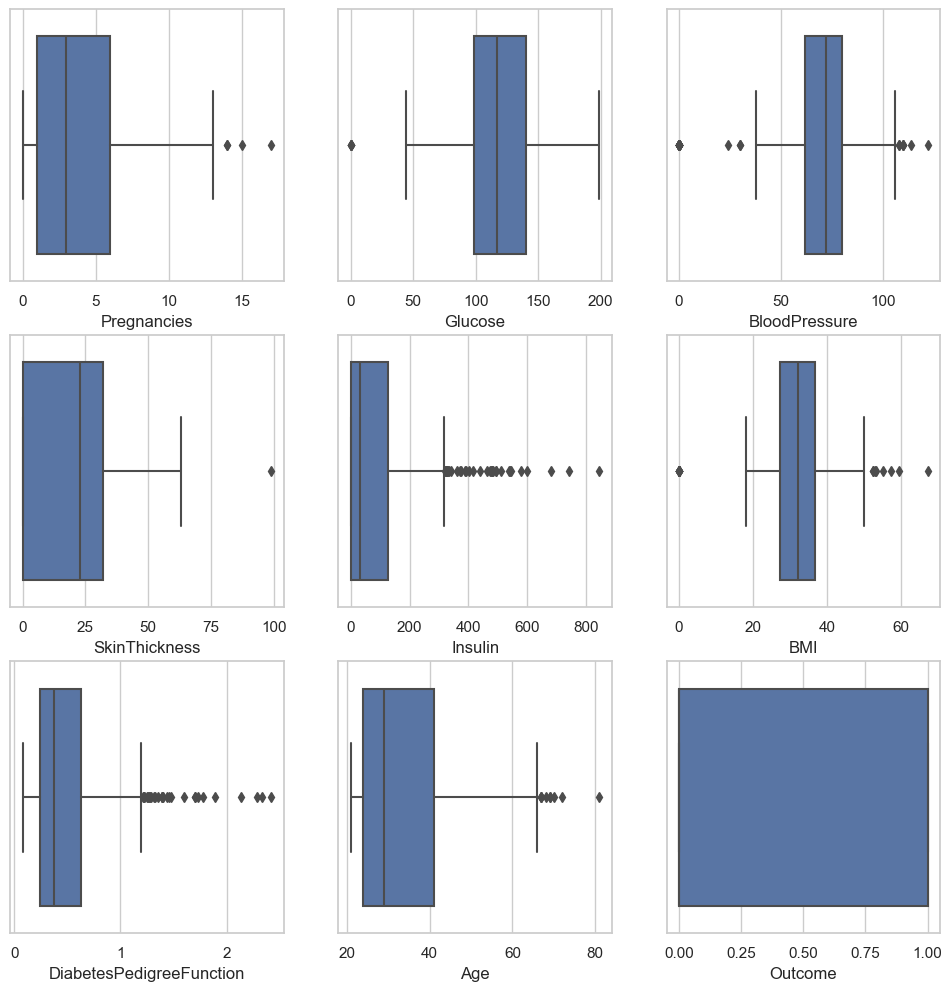

In [13]:
# Remove any trailing spaces in column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

plt.figure(figsize=(12, 12))
for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=col, data=df_1)
plt.show()

# Observations:

 there are outliers in all columns some have low and some has high
 
 

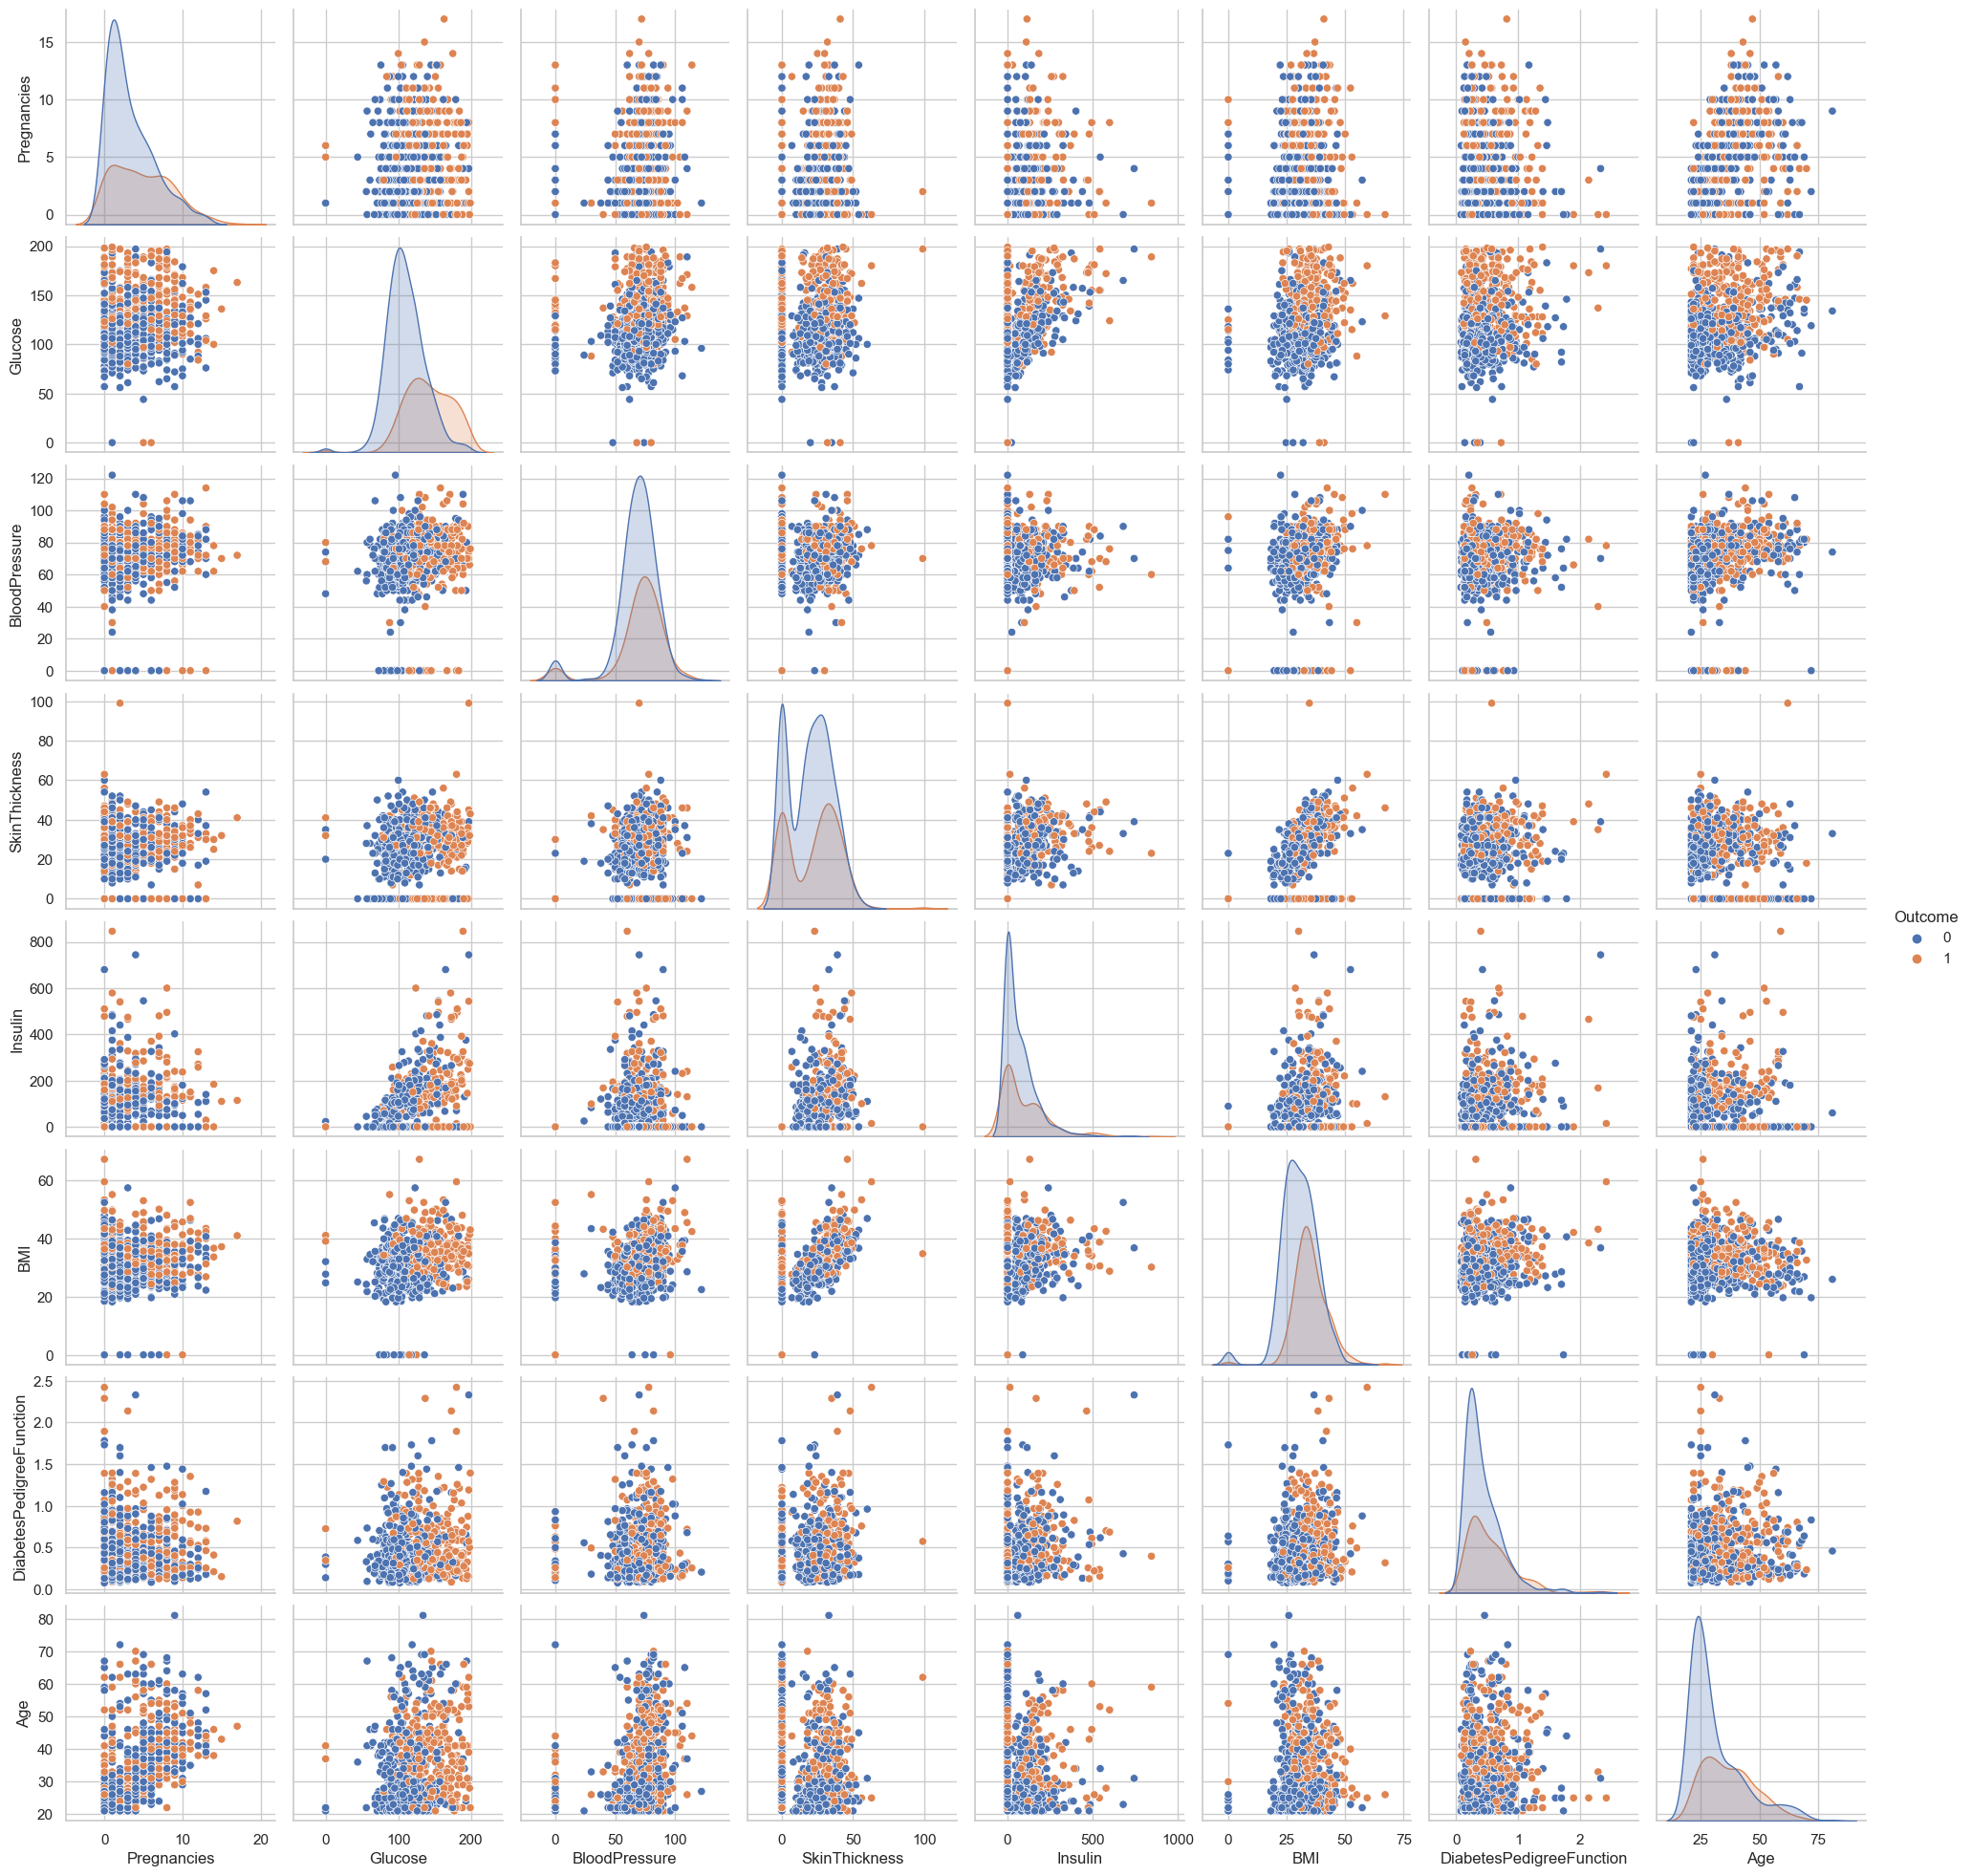

In [14]:
# Corrected pairplot call
sns.pairplot(df_1, hue='Outcome')
plt.show()

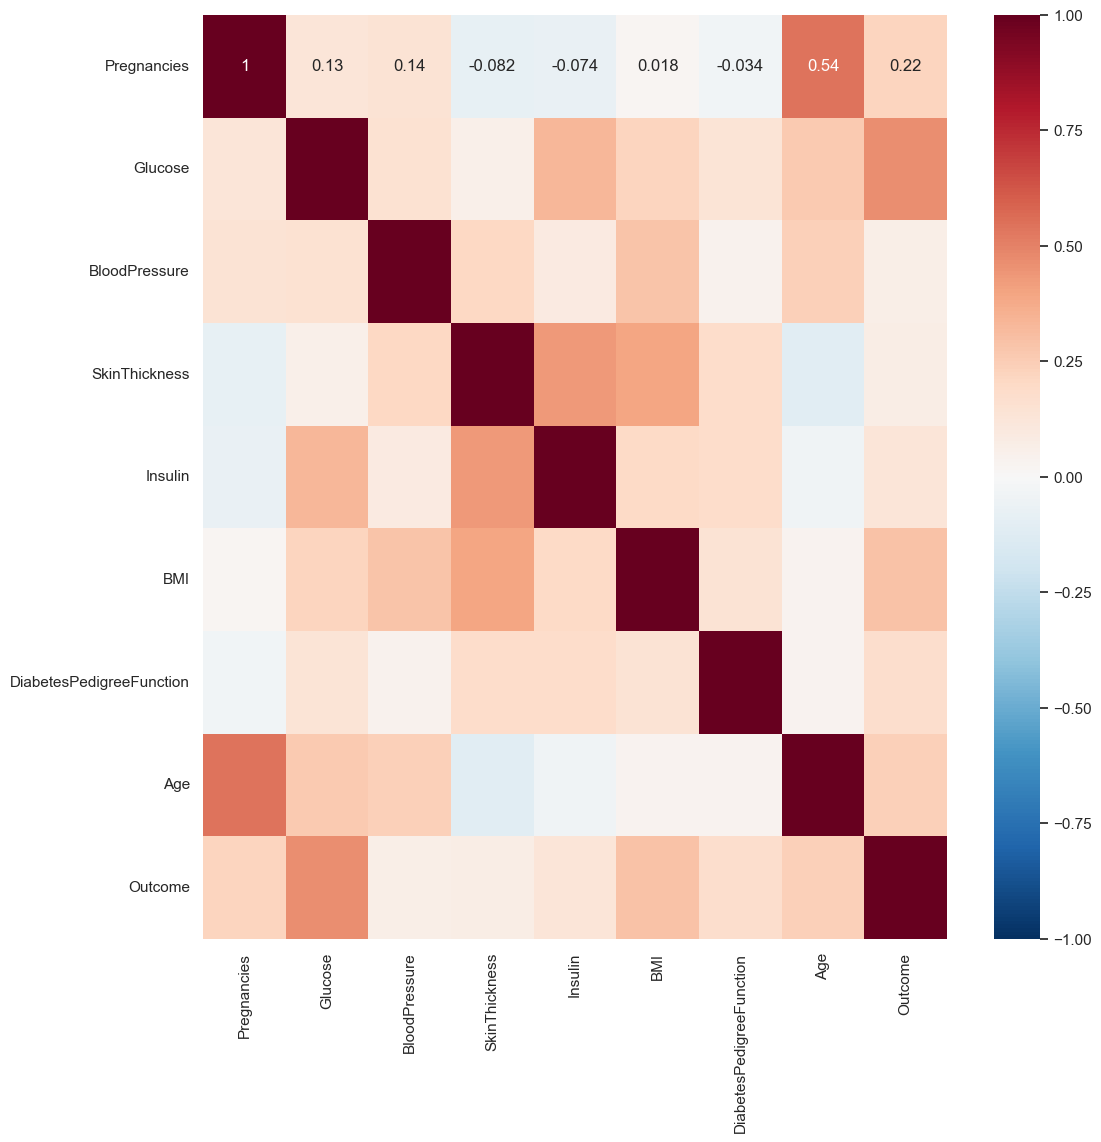

In [15]:
plt.figure(figsize = (12,12))
sns.heatmap(df_1.corr(), vmin= -1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()

# Standard Scaling


In [16]:
from sklearn.preprocessing import StandardScaler
# Dropping the 'Outcome' column and scaling the remaining features
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_1.drop('Outcome', axis=1)), 
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [18]:
Y = df_1['Outcome']

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Machine Learning Section


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, Y_train)

# Step 2: Make predictions
y_pred = knn.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Accuracy: 77.06%
Confusion Matrix:
[[134  23]
 [ 30  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.66      0.59      0.62        74

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231



# Logistic Regression


In [25]:
from sklearn.preprocessing import StandardScaler
import joblib

# Dropping the 'Outcome' column and scaling the remaining features
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_1.drop('Outcome', axis=1)), 
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

Y = df_1['Outcome']

from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=10000)

# Fit the model
try:
    logreg.fit(X_train, Y_train)
    # Save the trained model and scaler
    joblib.dump(logreg, 'best_model_lr1.pkl')
    joblib.dump(sc_X, 'scaler.pkl')  # Save the fitted scaler
    print("Model and scaler saved successfully.")
except Exception as e:
    print(f"An error occurred during fitting: {e}")
    exit()

# Step 5: Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Model and scaler saved successfully.
Accuracy: 77.06%
Confusion Matrix:
[[134  23]
 [ 30  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.66      0.59      0.62        74

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231



# Decision Tree Algorithm

Accuracy: 74.03%
Confusion Matrix:
[[124  33]
 [ 27  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       157
           1       0.59      0.64      0.61        74

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.75      0.74      0.74       231



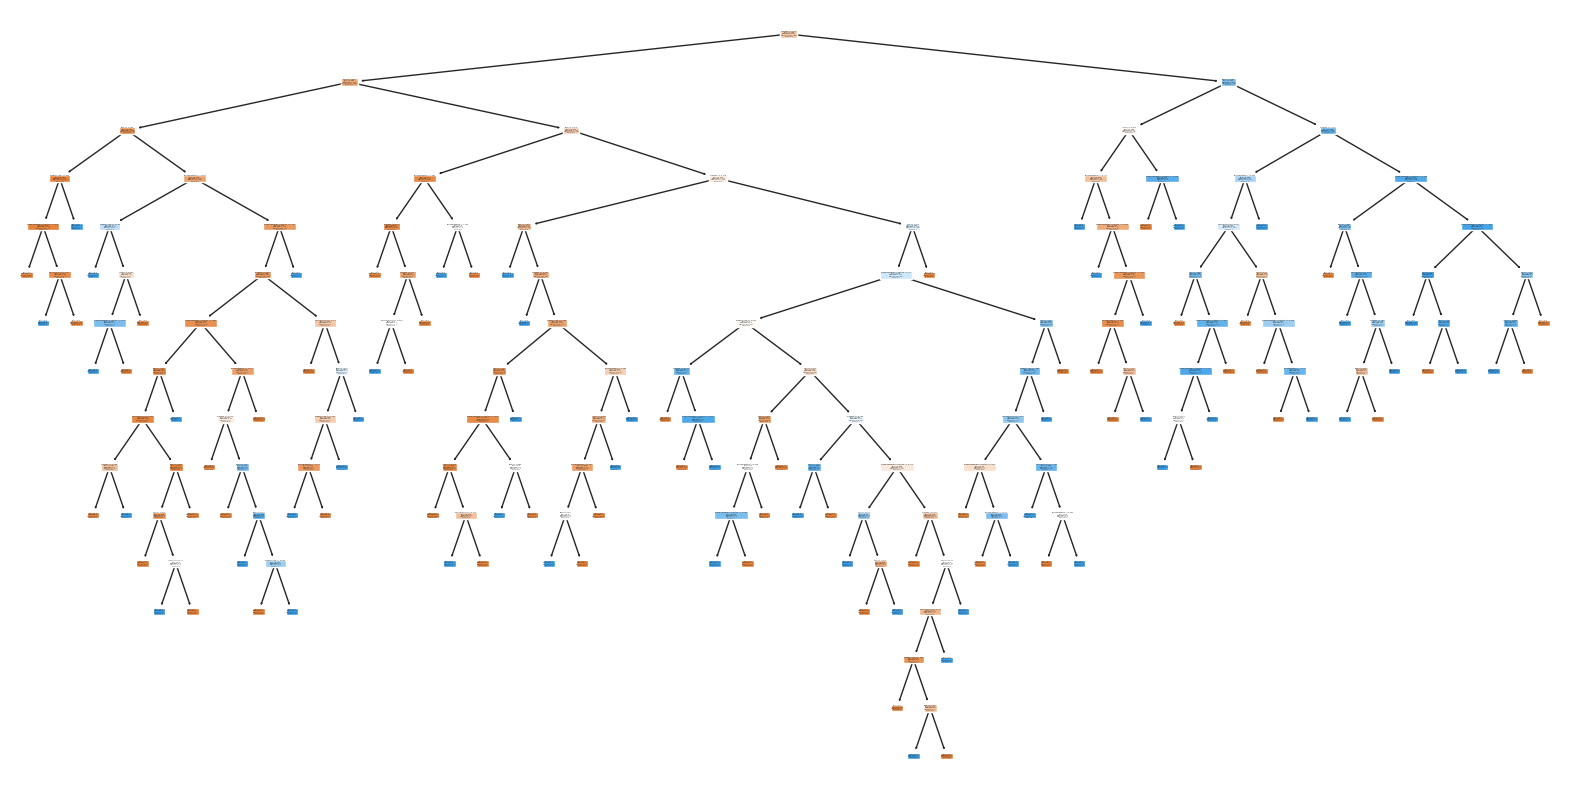

In [77]:
from sklearn.tree import DecisionTreeClassifier
# Step 1: Initialize and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, Y_train)

# Step 2: Make predictions
y_pred = dtree.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Optional: Visualize the decision tree (requires graphviz)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

Accuracy: 77.92%
Confusion Matrix:
[[139  18]
 [ 33  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.69      0.55      0.62        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



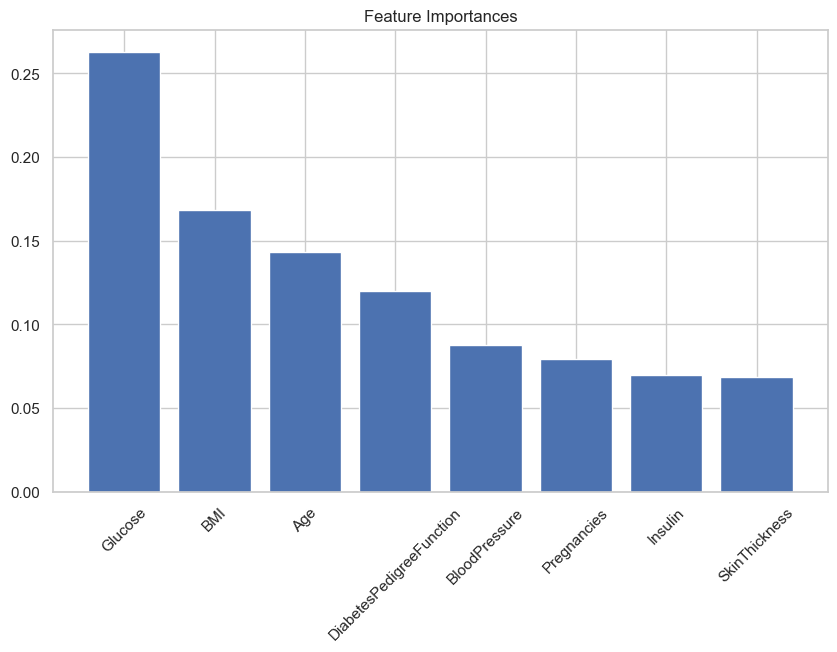

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize and train the Random Forest model
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, Y_train)

# Step 2: Make predictions
Y_pred = rforest.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Optional: Feature importance plot
importances = rforest.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.show()

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4868 - loss: 0.7169 - val_accuracy: 0.5926 - val_loss: 0.6913
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 0.7064 - val_accuracy: 0.6296 - val_loss: 0.6705
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 0.6774 - val_accuracy: 0.6481 - val_loss: 0.6506
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6573 - loss: 0.6454 - val_accuracy: 0.6481 - val_loss: 0.6308
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6588 - loss: 0.6289 - val_accuracy: 0.6667 - val_loss: 0.6137
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 0.6244 - val_accuracy: 0.7037 - val_loss: 0.5996
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6982 - loss: 0.6090 - val_accuracy: 0.7037 - val_loss: 0.5861
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5861 - val_accuracy: 0.7222 - val_loss

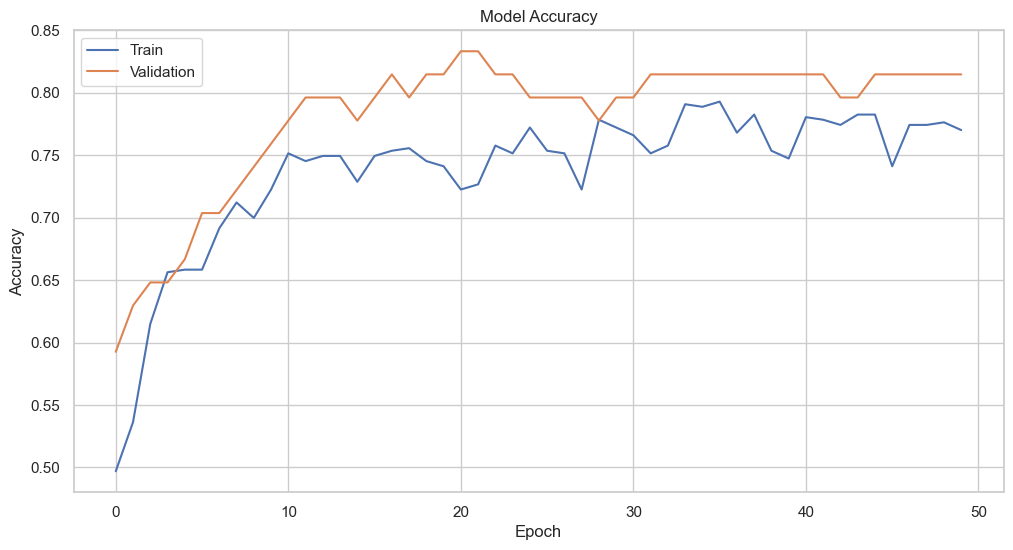

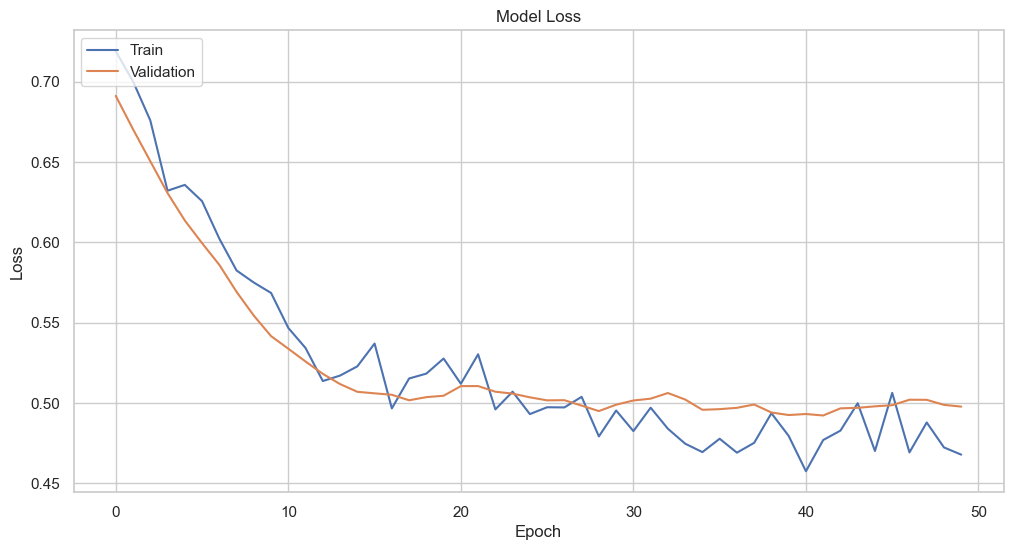

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Step 1: Build the Neural Network model with Dropout and Regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 4: Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Step 5: Evaluate the model
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Checking Best Model 


Best Model: Logistic Regression with Accuracy: 77.92%


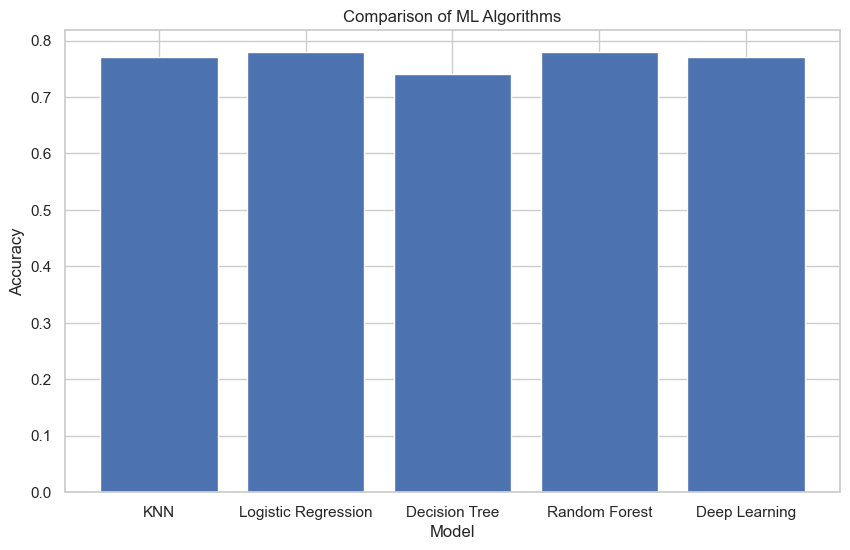

In [82]:

# Print the best model
best_model = max(results, key=results.get)
print(f'\nBest Model: {best_model} with Accuracy: {results[best_model] * 100:.2f}%')

# Optional: Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Algorithms')
plt.show()

# Saving best model 

In [84]:
import joblib

# Save the Random Forest model
joblib.dump(logreg, 'best_model_lr.pkl')

['best_model_lr.pkl']